# **Project** : Why Verstappen Beat Hamilton – A Telemetry & Strategy Analysis of Abu Dhabi 2021F1 

### 🏁 How Max Verstappen Won the 2021 Abu Dhabi Grand Prix

On December 12, 2021, the F1 world witnessed one of the most dramatic finishes in history at the Yas Marina Circuit. In this notebook, we use telemetry and lap data to explore **how Max Verstappen overcame Lewis Hamilton** in the final laps to clinch the world championship.

We'll analyze:
- Speed, throttle, gear, and RPM differences
- Lap time progression
- Final-lap aggression and pace

In [3]:
!pip install fastf1


In [6]:
import os
import fastf1

# Create cache directory if it doesn't exist
if not os.path.exists('./cache'):
    os.makedirs('./cache')

fastf1.Cache.enable_cache('./cache')

session = fastf1.get_session(2021, 'Abu Dhabi', 'R')
session.load()

core           INFO 	Loading data for Abu Dhabi Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No 

### Explore Drivers 

In [8]:
drivers = session.drivers
print("Drivers:", drivers)



Drivers: ['33', '44', '55', '22', '10', '77', '4', '14', '31', '16', '5', '3', '18', '47', '11', '6', '99', '63', '7', '9']


In [34]:

laps = session.laps
ver_fastest = laps.pick_drivers('VER').pick_fastest()
 
ham_fastest = laps.pick_drivers('HAM').pick_fastest()

# Get telemetry
ver_tel = ver_fastest.get_telemetry()
ham_tel = ham_fastest.get_telemetry()

# 🔥 Fastest Lap Telemetry Comparison

Let’s start by comparing both drivers’ **fastest laps** to understand where Max was quicker.

# Speed vs Distance

##### Did Max carry more speed through corners or straights?

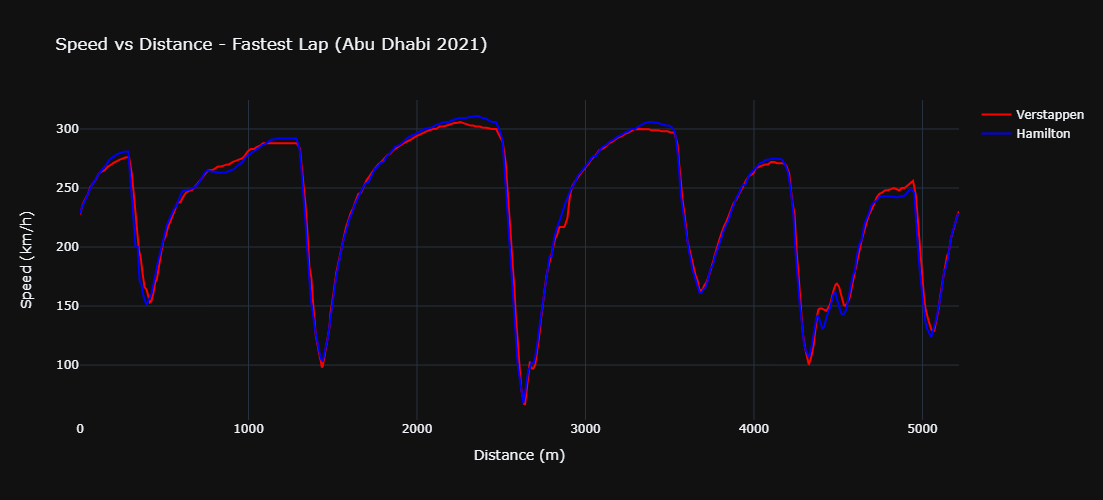

In [19]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ver_tel['Distance'], y=ver_tel['Speed'],
    mode='lines', name='Verstappen', line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=ham_tel['Distance'], y=ham_tel['Speed'],
    mode='lines', name='Hamilton', line=dict(color='blue')
))

fig.update_layout(
    title='Speed vs Distance - Fastest Lap (Abu Dhabi 2021)',
    xaxis_title='Distance (m)', yaxis_title='Speed (km/h)',
    template='plotly_dark', hovermode='x unified', height=500
)

fig.show()

# Throttle vs Distance
##### Did Max get on the throttle earlier out of corners?

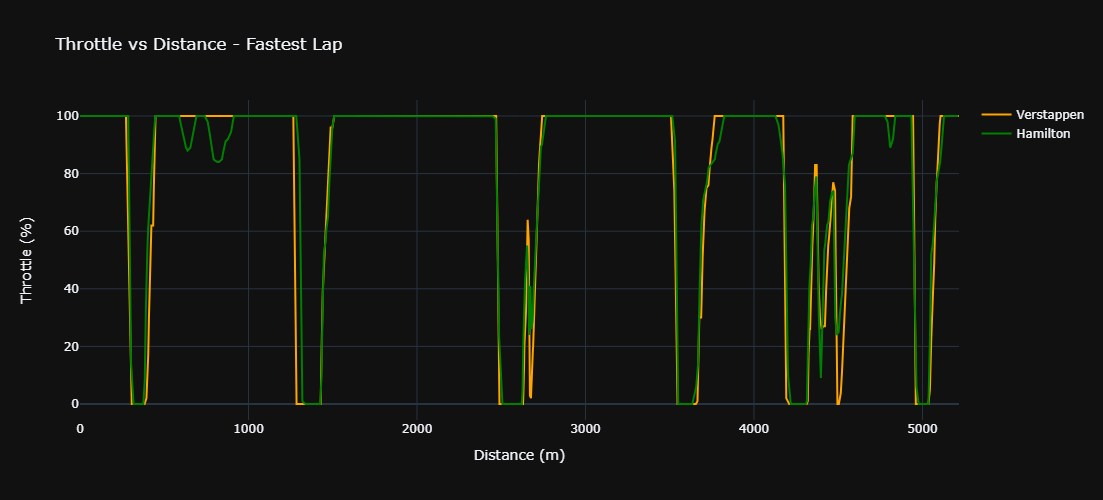

In [20]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ver_tel['Distance'], y=ver_tel['Throttle'],
    mode='lines', name='Verstappen', line=dict(color='orange')
))

fig.add_trace(go.Scatter(
    x=ham_tel['Distance'], y=ham_tel['Throttle'],
    mode='lines', name='Hamilton', line=dict(color='green')
))

fig.update_layout(
    title='Throttle vs Distance - Fastest Lap',
    xaxis_title='Distance (m)', yaxis_title='Throttle (%)',
    template='plotly_dark', hovermode='x unified', height=500
)

fig.show()


# Brake vs Distance
##### Where did Hamilton brake earlier or harder?

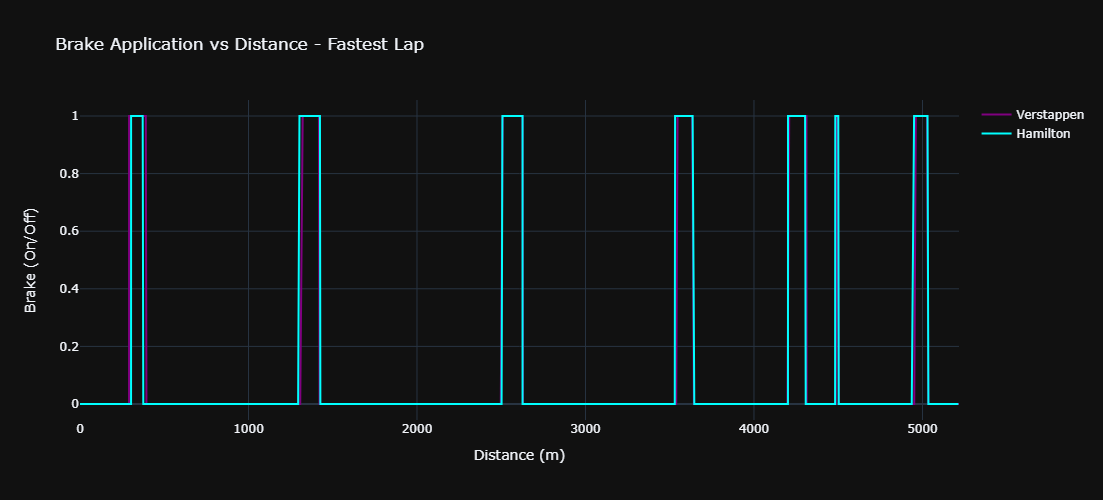

In [21]:
# Convert brake boolean to integer for plotting
ver_tel['Brake'] = ver_tel['Brake'].astype(int)
ham_tel['Brake'] = ham_tel['Brake'].astype(int)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ver_tel['Distance'], y=ver_tel['Brake'],
    mode='lines', name='Verstappen', line=dict(color='purple')
))

fig.add_trace(go.Scatter(
    x=ham_tel['Distance'], y=ham_tel['Brake'],
    mode='lines', name='Hamilton', line=dict(color='cyan')
))

fig.update_layout(
    title='Brake Application vs Distance - Fastest Lap',
    xaxis_title='Distance (m)', yaxis_title='Brake (On/Off)',
    template='plotly_dark', hovermode='x unified', height=500
)

fig.show()


# Gear Usage vs Distance
##### Did Max shift gears more aggressively?

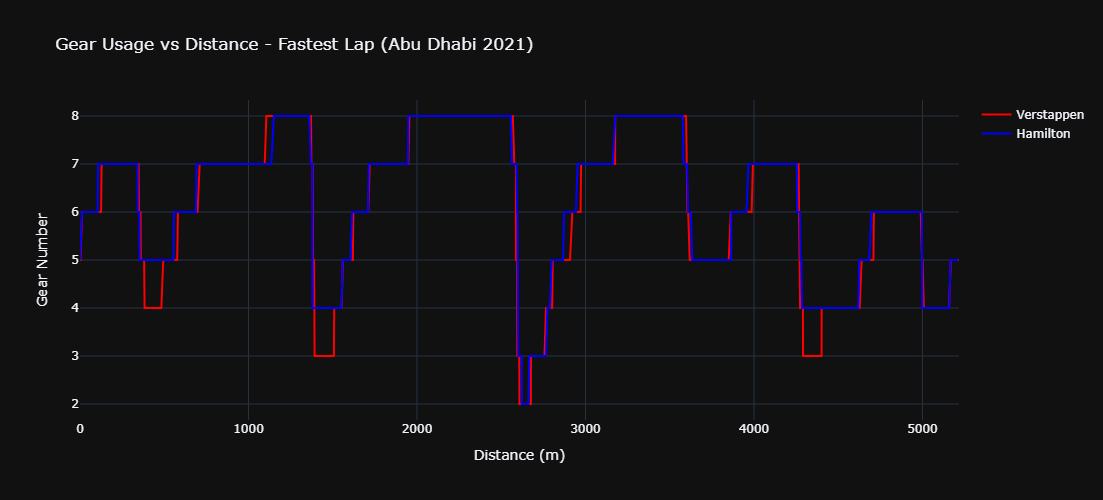

In [22]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ver_tel['Distance'],
    y=ver_tel['nGear'],  # Gear number
    mode='lines',
    name='Verstappen',
    line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=ham_tel['Distance'],
    y=ham_tel['nGear'],
    mode='lines',
    name='Hamilton',
    line=dict(color='blue')
))

fig.update_layout(
    title='Gear Usage vs Distance - Fastest Lap (Abu Dhabi 2021)',
    xaxis_title='Distance (m)',
    yaxis_title='Gear Number',
    template='plotly_dark',
    hovermode='x unified',
    height=500
)

fig.show()


# RPM vs Distance
##### Higher RPMs could mean higher acceleration zones



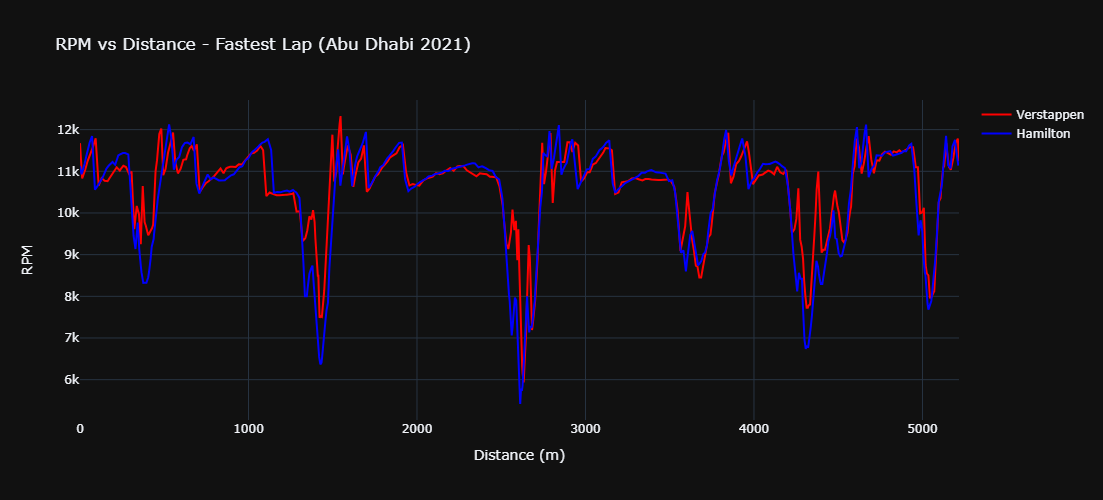

In [23]:
import plotly.graph_objects as go

fig = go.Figure()

# Verstappen
fig.add_trace(go.Scatter(
    x=ver_tel['Distance'],
    y=ver_tel['RPM'],
    mode='lines',
    name='Verstappen',
    line=dict(color='red')
))

# Hamilton
fig.add_trace(go.Scatter(
    x=ham_tel['Distance'],
    y=ham_tel['RPM'],
    mode='lines',
    name='Hamilton',
    line=dict(color='blue')
))

fig.update_layout(
    title='RPM vs Distance - Fastest Lap (Abu Dhabi 2021)',
    xaxis_title='Distance (m)',
    yaxis_title='RPM',
    template='plotly_dark',
    hovermode='x unified',
    height=500
)

fig.show()


📌 **Observation:** Max carries more speed through corners like Turn 5 and Turn 9. His throttle application is also more aggressive out of slow-speed corners.


# ⏱ Race Pace Evolution

How did each driver’s lap time evolve over the full race?


# Lap Time Comparison
##### Was Max consistently faster across laps?


In [24]:
import pandas as pd

# Drop laps with missing time (e.g., pit laps or under SC)
ver_laps_clean = ver_laps[ver_laps['LapTime'].notnull()].copy()
ham_laps_clean = ham_laps[ham_laps['LapTime'].notnull()].copy()

# Convert timedelta to float seconds
ver_laps_clean['LapTime(s)'] = ver_laps_clean['LapTime'].dt.total_seconds()
ham_laps_clean['LapTime(s)'] = ham_laps_clean['LapTime'].dt.total_seconds()


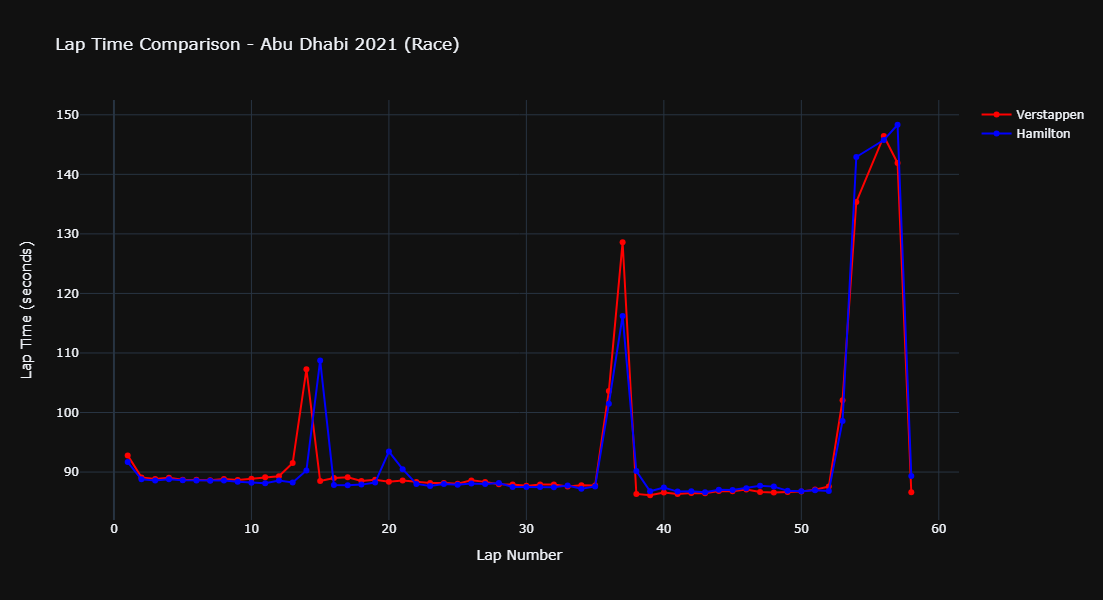

In [25]:
import plotly.graph_objects as go

fig = go.Figure()

# Verstappen
fig.add_trace(go.Scatter(
    x=ver_laps_clean['LapNumber'],
    y=ver_laps_clean['LapTime(s)'],
    mode='lines+markers',
    name='Verstappen',
    line=dict(color='red')
))

# Hamilton
fig.add_trace(go.Scatter(
    x=ham_laps_clean['LapNumber'],
    y=ham_laps_clean['LapTime(s)'],
    mode='lines+markers',
    name='Hamilton',
    line=dict(color='blue')
))

fig.update_layout(
    title='Lap Time Comparison - Abu Dhabi 2021 (Race)',
    xaxis_title='Lap Number',
    yaxis_title='Lap Time (seconds)',
    template='plotly_dark',
    hovermode='x unified',
    height=600
)

fig.show()


📌 **Observation:** Hamilton was faster for most of the race, but Verstappen’s lap times started improving significantly after Lap 50 — especially after his final pit stop for fresh soft tyres under the Safety Car.


# 🚨 Final Push – Laps 49 to 58

Let’s zoom into the final 10 laps where Max began his charge.


# Final 10 Lap Comparison Chart:

In [32]:
# Filter to last 10 laps (lap 49 onward)
ver_final = ver_laps_clean[ver_laps_clean['LapNumber'] >= 49]
ham_final = ham_laps_clean[ham_laps_clean['LapNumber'] >= 49]


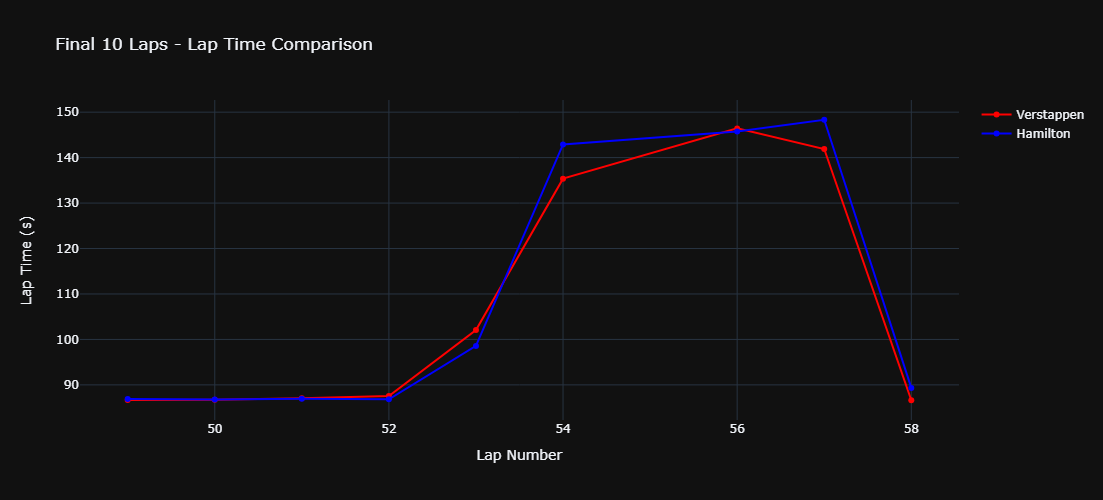

In [33]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ver_final['LapNumber'],
    y=ver_final['LapTime(s)'],
    mode='lines+markers',
    name='Verstappen',
    line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=ham_final['LapNumber'],
    y=ham_final['LapTime(s)'],
    mode='lines+markers',
    name='Hamilton',
    line=dict(color='blue')
))

fig.update_layout(
    title='Final 10 Laps - Lap Time Comparison',
    xaxis_title='Lap Number',
    yaxis_title='Lap Time (s)',
    template='plotly_dark',
    hovermode='x unified',
    height=500
)

fig.show()


📌 **Observation:** Max’s lap times drop steadily after Lap 54, while Hamilton's plateau. His final lap (Lap 58) is one of the fastest, highlighting the tyre advantage and aggressive push.


#  Highlight the Safety Car Period & Final Lap on Lap Time Chart


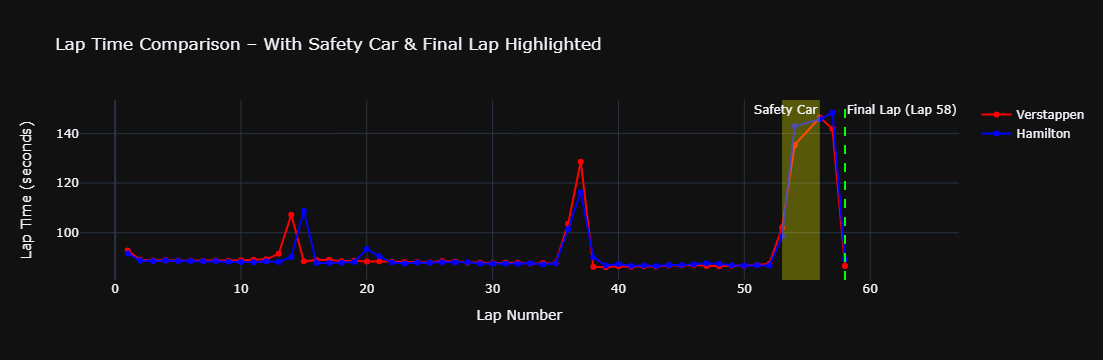

In [38]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ver_laps_clean['LapNumber'],
    y=ver_laps_clean['LapTime(s)'],
    name='Verstappen', mode='lines+markers', line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=ham_laps_clean['LapNumber'],
    y=ham_laps_clean['LapTime(s)'],
    name='Hamilton', mode='lines+markers', line=dict(color='blue')
))

# Add shaded rectangle for Safety Car period (Lap 53–56)
fig.add_vrect(
    x0=53, x1=56,
    annotation_text="Safety Car",
    fillcolor="yellow", opacity=0.3, line_width=0
)

# Add vertical line for Lap 58
fig.add_vline(
    x=58,
    line=dict(color="lime", width=2, dash="dash"),
    annotation_text="Final Lap (Lap 58)",
    annotation_position="top right"
)

# Final chart layout
fig.update_layout(
    title='Lap Time Comparison – With Safety Car & Final Lap Highlighted',
    xaxis_title='Lap Number',
    yaxis_title='Lap Time (seconds)',
    template='plotly_dark',
    hovermode='x unified'
)

fig.show()


# 🏎️ The Decider – Lap 58

Here’s a telemetry breakdown of the final lap, where Verstappen overtook Hamilton after the Safety Car restart.


## Final Lap Telemetry

In [60]:
# Get laps for both drivers
laps = session.laps
ver_lap58 = laps.pick_drivers('VER').loc[laps['LapNumber'] == 58].iloc[0]
ham_lap58 = laps.pick_drivers('HAM').loc[laps['LapNumber'] == 58].iloc[0]

# Load telemetry for each
ver_tel = ver_lap58.get_telemetry().add_distance()
ham_tel = ham_lap58.get_telemetry().add_distance()


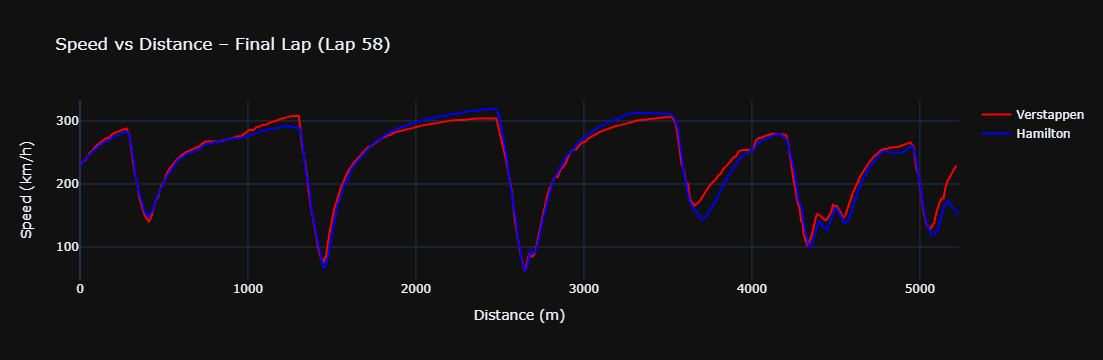

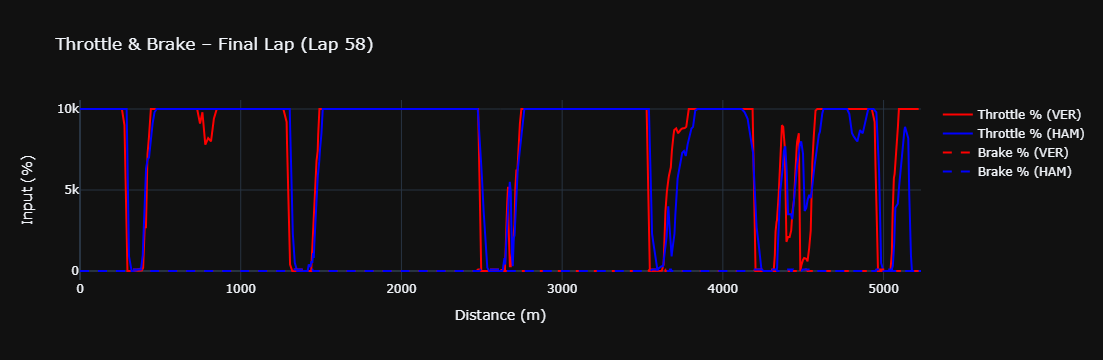

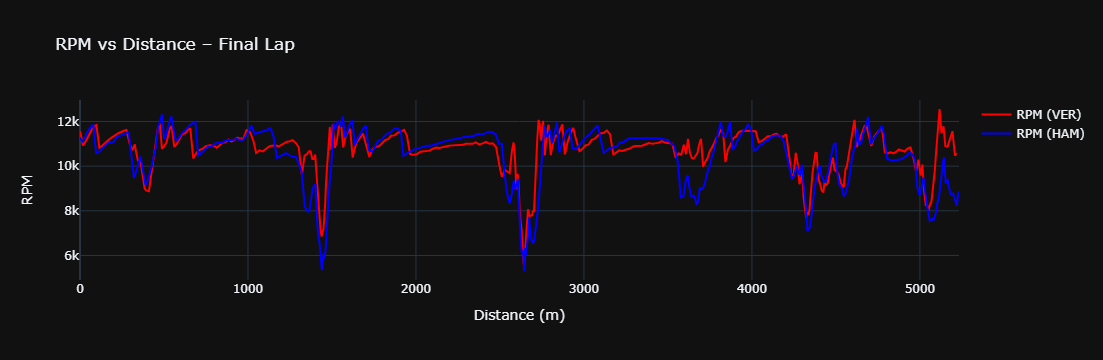

In [59]:
#Plot Speed vs Distance (Lap 58

import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ver_tel['Distance'], y=ver_tel['Speed'],
    mode='lines', name='Verstappen', line=dict(color='red')
))

fig.add_trace(go.Scatter(
    x=ham_tel['Distance'], y=ham_tel['Speed'],
    mode='lines', name='Hamilton', line=dict(color='blue')
))

fig.update_layout(
    title='Speed vs Distance – Final Lap (Lap 58)',
    xaxis_title='Distance (m)',
    yaxis_title='Speed (km/h)',
    template='plotly_dark'
)

fig.show()


#Throttle & Brake Overlay


fig = go.Figure()

# Throttle
fig.add_trace(go.Scatter(
    x=ver_tel['Distance'], y=ver_tel['Throttle'] * 100,
    mode='lines', name='Throttle % (VER)', line=dict(color='red')
))
fig.add_trace(go.Scatter(
    x=ham_tel['Distance'], y=ham_tel['Throttle'] * 100,
    mode='lines', name='Throttle % (HAM)', line=dict(color='blue')
))

# Brake (binary)
fig.add_trace(go.Scatter(
    x=ver_tel['Distance'], y=ver_tel['Brake'] * 100,
    mode='lines', name='Brake % (VER)', line=dict(color='red', dash='dash')
))
fig.add_trace(go.Scatter(
    x=ham_tel['Distance'], y=ham_tel['Brake'] * 100,
    mode='lines', name='Brake % (HAM)', line=dict(color='blue', dash='dash')
))

fig.update_layout(
    title='Throttle & Brake – Final Lap (Lap 58)',
    xaxis_title='Distance (m)',
    yaxis_title='Input (%)',
    template='plotly_dark'
)

fig.show()


#Gear & RPM


fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ver_tel['Distance'], y=ver_tel['RPM'],
    mode='lines', name='RPM (VER)', line=dict(color='red')
))
fig.add_trace(go.Scatter(
    x=ham_tel['Distance'], y=ham_tel['RPM'],
    mode='lines', name='RPM (HAM)', line=dict(color='blue')
))

fig.update_layout(
    title='RPM vs Distance – Final Lap',
    xaxis_title='Distance (m)',
    yaxis_title='RPM',
    template='plotly_dark'
)

fig.show()


📌 **Observation:** Max’s throttle is nearly 100% through Turn 5 exit, where he dives past Hamilton using DRS. His braking and gear change behavior show maximum commitment.


# 🛞 Tyre Strategy & Pit Stops

A visual timeline of pit stops and tyre usage explains why Max had better grip at the end.


# Pit Strategy Timeline
##### Who had the better tyre strategy?



In [49]:
import pandas as pd
import plotly.express as px

# Force all fields to basic Python int (not numpy, datetime, or timedelta)
pit_data = pd.DataFrame({
    'Driver': ['HAM', 'HAM', 'VER', 'VER', 'VER'],
    'Tyre': ['Medium', 'Hard', 'Medium', 'Hard', 'Soft'],
    'Start': [int(x) for x in [0, 14, 0, 36, 53]],
    'End': [int(x) for x in [14, 58, 36, 53, 58]]
})

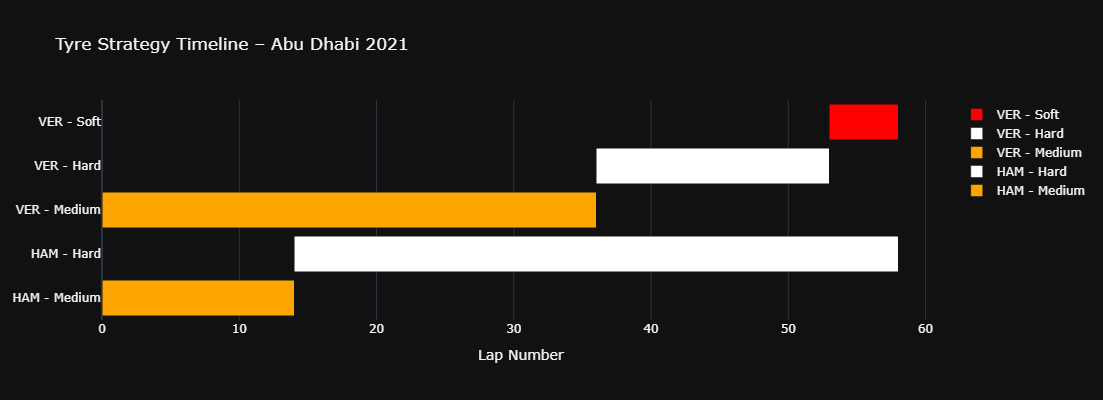

In [52]:
import plotly.graph_objects as go

# Set unique y-axis positions for each stint
pit_data['Stint'] = range(len(pit_data))

# Draw bars manually using go.Figure
fig = go.Figure()

colors = {'Soft': 'red', 'Hard': 'white', 'Medium': 'orange'}

for _, row in pit_data.iterrows():
    fig.add_trace(go.Bar(
        x=[row['End'] - row['Start']],  # Width of the bar = stint length
        y=[row['Stint']],
        base=row['Start'],
        orientation='h',
        name=f"{row['Driver']} - {row['Tyre']}",
        marker=dict(color=colors[row['Tyre']]),
        hovertext=f"Driver: {row['Driver']}<br>Tyre: {row['Tyre']}<br>Lap {row['Start']}–{row['End']}"
    ))

# Clean up layout
fig.update_layout(
    title="Tyre Strategy Timeline – Abu Dhabi 2021",
    xaxis_title="Lap Number",
    yaxis=dict(
        tickvals=pit_data['Stint'],
        ticktext=[f"{d} - {t}" for d, t in zip(pit_data['Driver'], pit_data['Tyre'])],
        showgrid=False
    ),
    barmode='stack',
    height=400,
    template='plotly_dark'
)

fig.show()



📌 **Strategic Advantage:**  
Hamilton pitted early for Hard tyres on Lap 14 and didn't pit again.  
Verstappen went longer (Lap 36) and then made a **crucial final stop** on Lap 53 during the **Safety Car** to take Soft tyres — which gave him a massive grip advantage on Lap 58.

The pit stop timing and tyre choice proved to be **the race-winning decision**.


# Race Position Timeline
##### How did Max regain position after Lap 57?


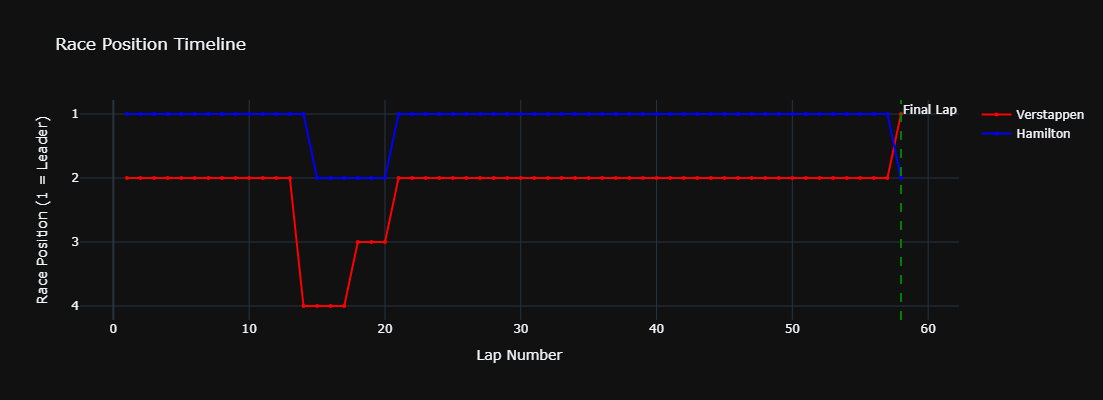

In [62]:
import plotly.graph_objects as go

# Filter laps for both drivers
ver_laps = session.laps.pick_drivers('VER')[['LapNumber', 'Position']]
ham_laps = session.laps.pick_drivers('HAM')[['LapNumber', 'Position']]

# Plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=ver_laps['LapNumber'], y=ver_laps['Position'],
    mode='lines+markers', name='Verstappen',
    line=dict(color='red'), marker=dict(size=4)
))

fig.add_trace(go.Scatter(
    x=ham_laps['LapNumber'], y=ham_laps['Position'],
    mode='lines+markers', name='Hamilton',
    line=dict(color='blue'), marker=dict(size=4)
))

fig.update_layout(
    title='Race Position Timeline',
    xaxis_title='Lap Number',
    yaxis_title='Race Position (1 = Leader)',
    yaxis_autorange='reversed',  # so P1 is at top
    template='plotly_dark',
    height=400
)
fig.add_vline(x=58, line_dash="dash", line_color="green", annotation_text="Final Lap")

fig.show()


# Conclusion

While Hamilton dominated most of the race, Verstappen's team made a bold strategic decision to pit under the Safety Car. With fresher soft tyres, Max’s final laps were faster, more aggressive, and well-executed — especially Lap 58, where telemetry shows superior throttle, braking, and top-end performance.

**Data proves what fans witnessed: Max Verstappen won through perfect timing, bold strategy, and exceptional execution.**
